### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [18]:
import pandas as pd

df = pd.read_csv('./data/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [19]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups
pickup_counts_by_date = pd.DataFrame(df.groupby(df['Date/Time'].dt.date).count()['Base'])
pickup_counts_by_date.rename(columns={'Base':'Pickups'}, inplace=True)

# Find the date with the highest number of pickups
date_with_highest_pickups = pickup_counts_by_date.sort_values(by = 'Pickups', ascending=False).head(1)
date_with_highest_pickups

,Pickups
Date/Time,
2014-08-07,32759


In [20]:
# We see the most number of Uber pickups on 07/08/2014 with a count of 327759

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [21]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
highest_pickups_date_df = df[df['Date/Time'].dt.date == date_with_highest_pickups.index[0]]

# Get the count of pickups on the highest date
highest_pickups_date_df.shape[0]


32759

In [22]:
# 32759 pickups were made on the date with the highest number of pickups, i.e on 07 August, 2014.

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [23]:
# Count the number of unique TLC base companies
print('The number of unique TLC base companies are', df['Base'].nunique())


The number of unique TLC base companies are 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [24]:
# Group by TLC base company and count the number of pickups
TLC_base_pickup = pd.DataFrame(df.groupby('Base').count()['Lat'])
TLC_base_pickup.rename(columns={'Lat':'Pickups'}, inplace=True)

# Find the TLC base company with the highest number of pickups
TLC_base_highest_pickups = TLC_base_pickup.sort_values(by = 'Pickups', ascending=False).head(1)
TLC_base_highest_pickups

,Pickups
Base,
B02617,355803


In [25]:
# B02617 is the TLC base company having the highest number of pickups.

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [26]:
# Group by TLC base company and count the number of pickups
df.groupby('Base').size()


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [27]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
hourly_pickup = pd.DataFrame(df.groupby('Hour').count()['Lat'])
hourly_pickup.rename(columns={'Lat':'Pickups'}, inplace=True)

# Find the hour with the highest number of pickups
hour_with_highest_pickups = hourly_pickup.sort_values(by = 'Pickups', ascending=False).head(1)
hour_with_highest_pickups


,Pickups
Hour,
17,57122


In [28]:
# The busiest time of the day for Uber pickups is 17:00 hours.

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

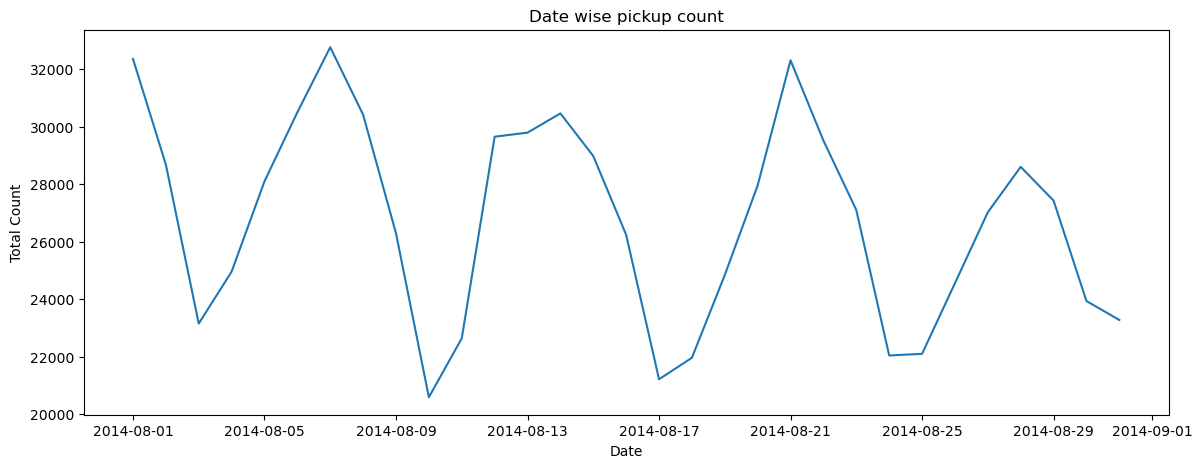

In [29]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
number_of_pickup_datewise = df.groupby(df['Date/Time'].dt.date).size()

# Create a line plot to visualize the number of pickups over time
number_of_pickup_datewise.plot(kind = 'line', figsize =(14,5))
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Date wise pickup count')
plt.show()


#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

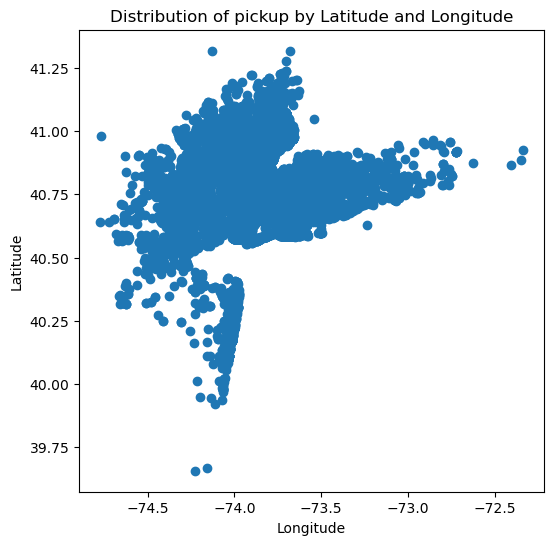

In [30]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize = (6,6))
plt.scatter(df['Lon'], df['Lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of pickup by Latitude and Longitude')
plt.show()


#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

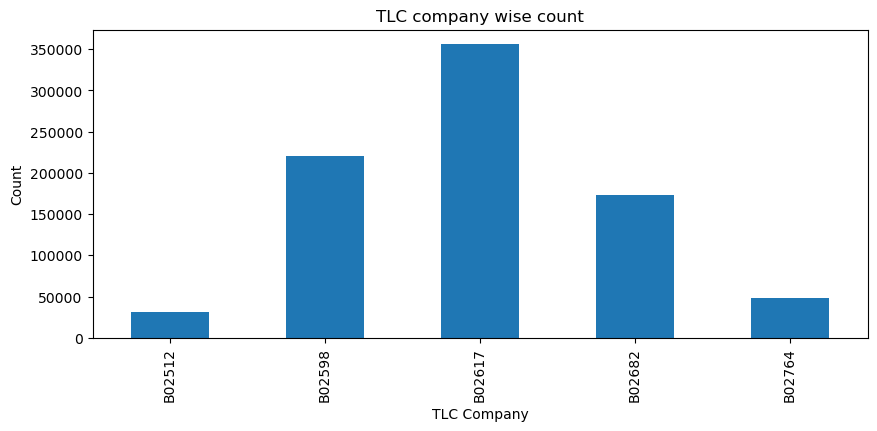

In [31]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
df.groupby('Base').size().plot(kind = 'bar',figsize = (10,4))
plt.xlabel('TLC Company')
plt.ylabel('Count')
plt.title('TLC company wise count')
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Text(0.5, 1.0, 'Percentage Distibutions of Uber Pickups by day of the Week')

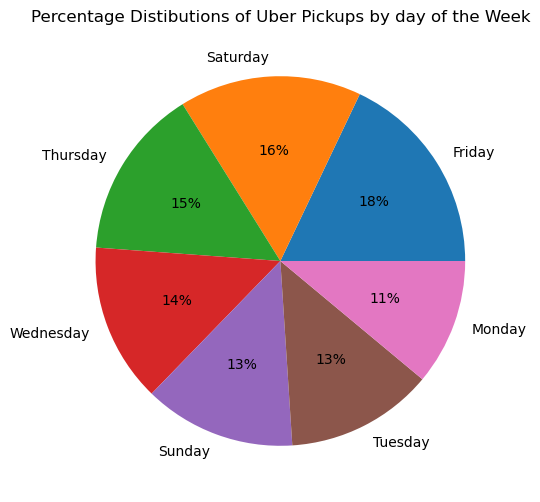

In [32]:
# Group by day of the week and count the number of pickups
dickups_by_day =  df['Date/Time'].dt.day_name().value_counts()

plt.figure(figsize = (8,6))

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(x =  dickups_by_day.values, labels =  dickups_by_day.index, autopct = '%1.f%%')
plt.title('Percentage Distibutions of Uber Pickups by day of the Week')


In [34]:
# Friday has the highest number of pickups followed by Saturday and Thursday indicating a pattern of increased activity or demand on Fridays, possibly due to the end of the workweek and the beginning of the weekend. 